# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [282]:
import pandas as pd
import numpy as np
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [283]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
261388,10.537496,57.727665,4.972004
417923,10.588411,57.730611,2.089609
87209,9.709456,57.315962,17.230785
432315,9.953178,56.967307,20.738031
231039,9.357328,57.154062,2.181576


In [284]:
min_samples = np.arange(2, 12, 1)
epsilons = np.arange(.05, .5, .01)
all_scores = []

for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(X[['lat','lon', 'alt']])
        
        # calculate silouette score here
        score = metrics.silhouette_score(X[['lon', 'lat', 'alt']], labels)
        
        scores.append(score)
        
        all_scores.append(scores)

In [285]:
# 2D Array Stored
scores_array = np.asarray(all_scores)
scores_array

array([[-0.52988025, -0.43820208, -0.34603869, ..., -0.54461572,
        -0.54363985, -0.54357115],
       [-0.52988025, -0.43820208, -0.34603869, ..., -0.54461572,
        -0.54363985, -0.54357115],
       [-0.52988025, -0.43820208, -0.34603869, ..., -0.54461572,
        -0.54363985, -0.54357115],
       ...,
       [-0.25779015, -0.25407057, -0.43850584, ...,  0.46404058,
         0.46391272,  0.48667503],
       [-0.25779015, -0.25407057, -0.43850584, ...,  0.46404058,
         0.46391272,  0.48667503],
       [-0.25779015, -0.25407057, -0.43850584, ...,  0.46404058,
         0.46391272,  0.48667503]])

<IPython.core.display.Javascript object>


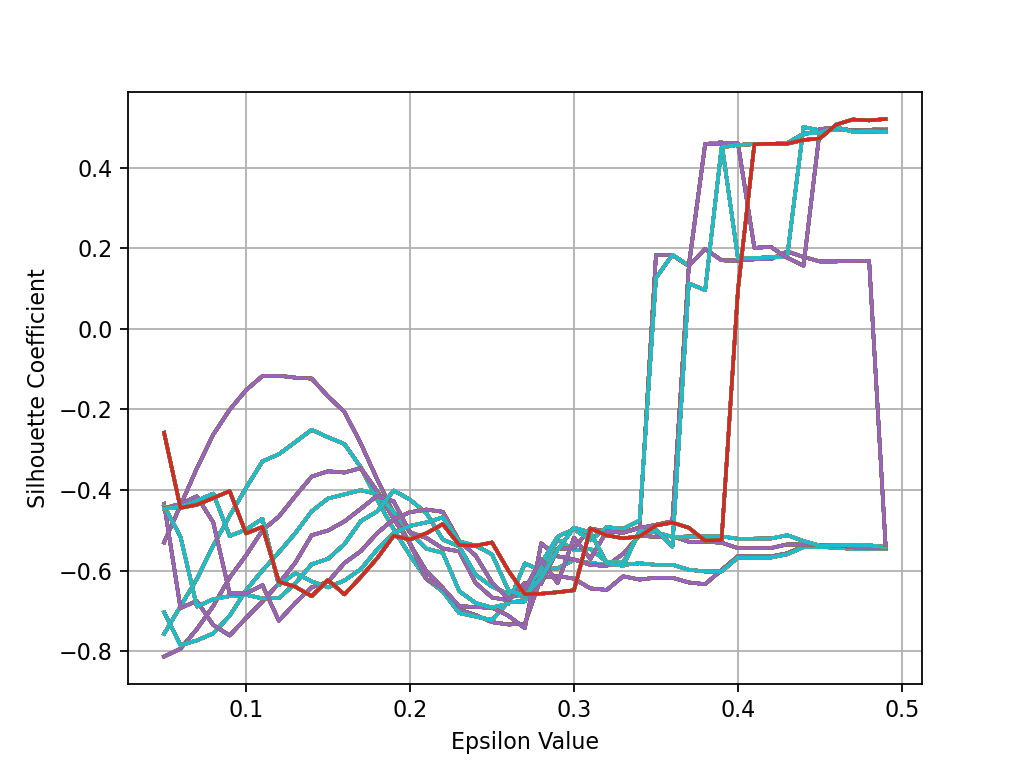

In [286]:
# Plotting Relationship Between Epsilon Value and Silhouette Coefficient

x = range(0, 404)

plt.figure()
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

for n in x:
    plt.plot(epsilons, scores_array[n])

plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [287]:
facebook = pd.read_csv('../data/Live_20210128.csv', index_col=False)

In [288]:
facebook

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [289]:
min_samples = np.arange(2, 12, 1)
epsilons = np.arange(10, 200, 5)
all_scores = []

for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(facebook[["num_reactions", "num_comments", "num_shares"]])
        
        # calculate silouette score here
        score = metrics.silhouette_score(facebook[["num_reactions", "num_comments", "num_shares"]], labels)

        scores.append(score)
        
        all_scores.append(scores)

In [290]:
scores_array = np.asarray(all_scores)
scores_array

array([[-0.46187896, -0.43721074, -0.41199307, ...,  0.56250319,
         0.55200135,  0.51551476],
       [-0.46187896, -0.43721074, -0.41199307, ...,  0.56250319,
         0.55200135,  0.51551476],
       [-0.46187896, -0.43721074, -0.41199307, ...,  0.56250319,
         0.55200135,  0.51551476],
       ...,
       [ 0.37731193,  0.29521987,  0.50643288, ...,  0.8315829 ,
         0.68616408,  0.67768173],
       [ 0.37731193,  0.29521987,  0.50643288, ...,  0.8315829 ,
         0.68616408,  0.67768173],
       [ 0.37731193,  0.29521987,  0.50643288, ...,  0.8315829 ,
         0.68616408,  0.67768173]])

<IPython.core.display.Javascript object>


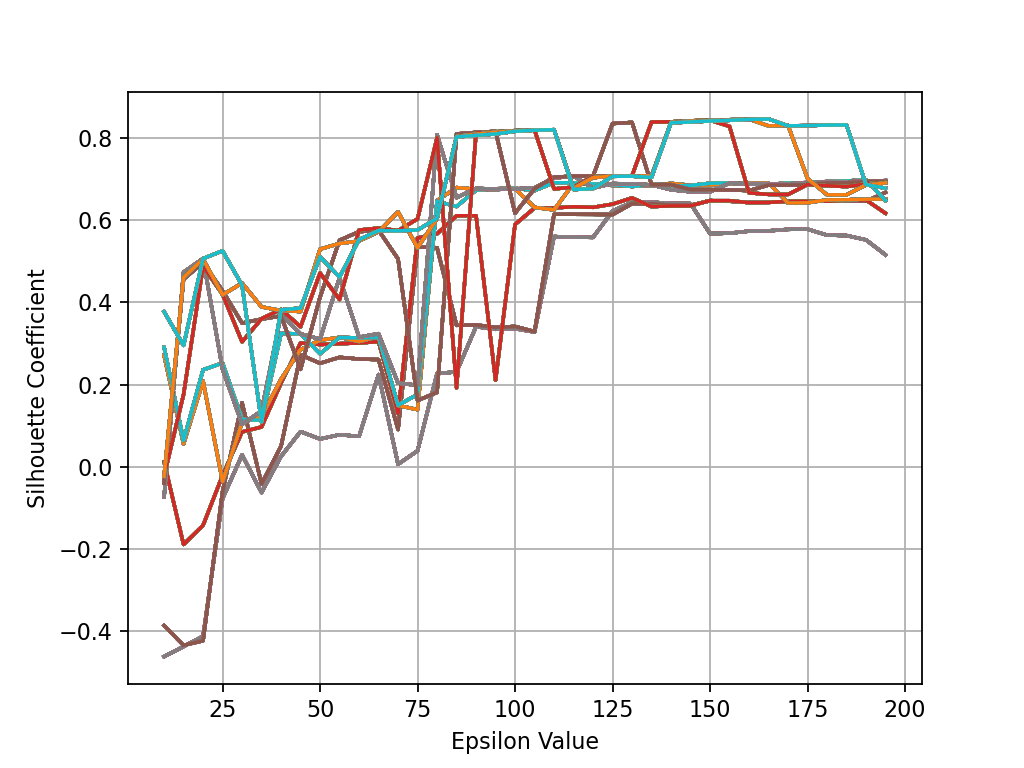

In [291]:
# Plotting Relationship Between Epsilon Value and Silhouette Coefficient

x = range(0, 380)

plt.figure()
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

for n in x:
    plt.plot(epsilons, scores_array[n])

plt.show()

<IPython.core.display.Javascript object>


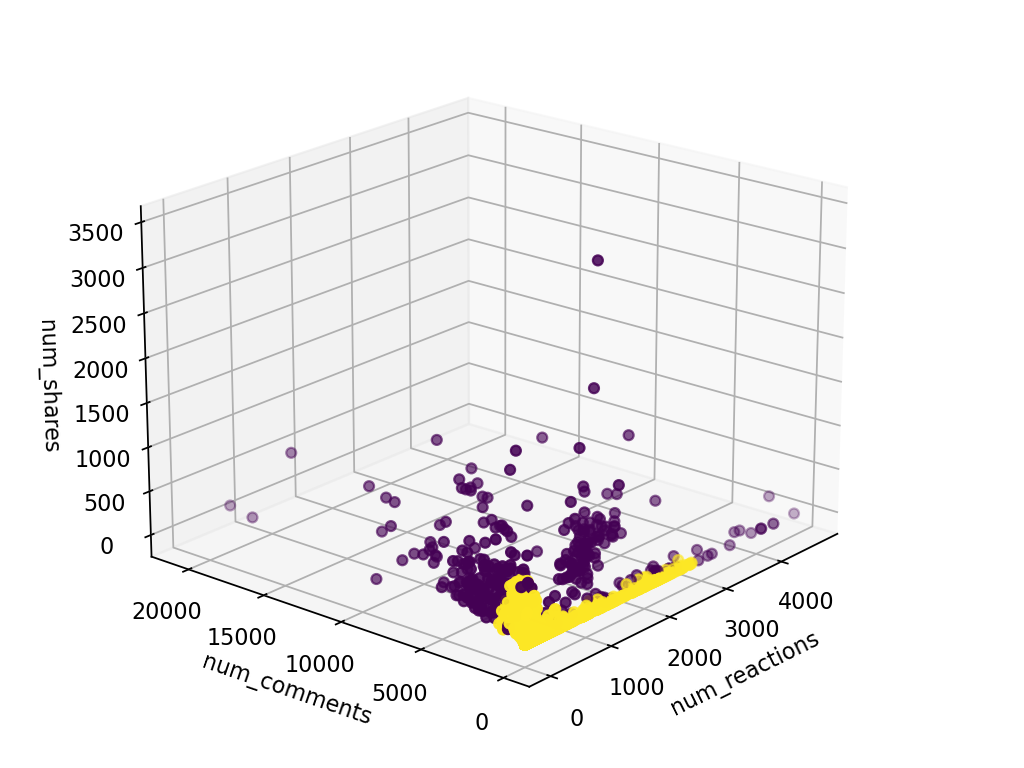

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_13460/3279252013.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)


In [300]:
# Epsilon 140 and High Min Samples

dbscan1 = DBSCAN(eps=140, min_samples=11)
labels1 = dbscan1.fit_predict(facebook[["num_reactions", "num_comments", "num_shares"]])


fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)

plt.cla()

ax.set_xlabel("num_reactions")
ax.set_ylabel("num_comments")
ax.set_zlabel("num_shares")

ax.scatter(facebook["num_reactions"], facebook["num_comments"], facebook["num_shares"], c=pd.Series(labels1))

plt.show()

<IPython.core.display.Javascript object>


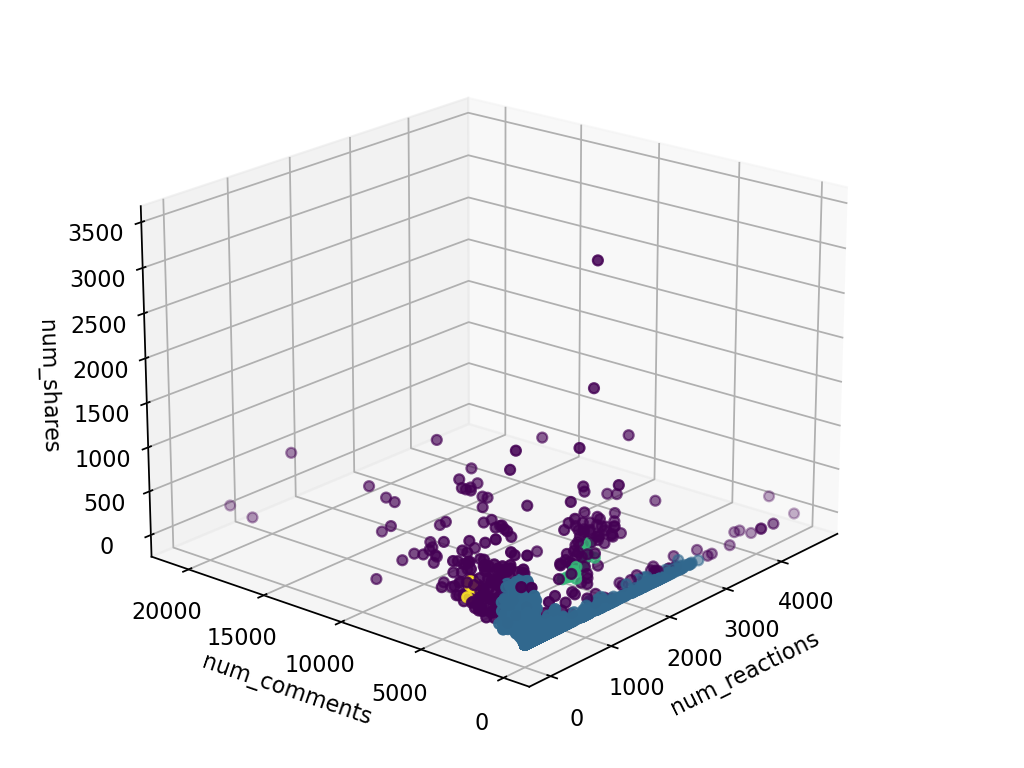

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_13460/95195616.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)


In [301]:
# Epsilon 140 and Medium Min Samples

dbscan2 = DBSCAN(eps=140, min_samples=6)
labels2 = dbscan2.fit_predict(facebook[["num_reactions", "num_comments", "num_shares"]])


fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)

plt.cla()

ax.set_xlabel("num_reactions")
ax.set_ylabel("num_comments")
ax.set_zlabel("num_shares")

ax.scatter(facebook["num_reactions"], facebook["num_comments"], facebook["num_shares"], c=pd.Series(labels2))

plt.show()

<IPython.core.display.Javascript object>


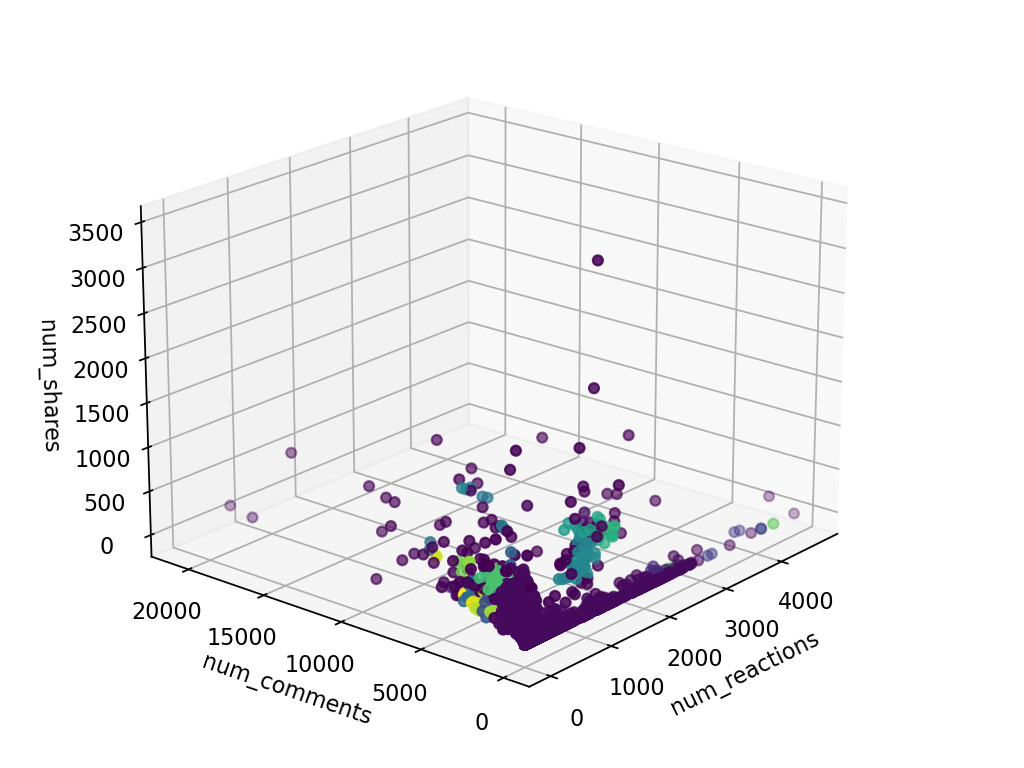

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_13460/805164187.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)


In [302]:
# Epsilon 140 and Low Min Samples

dbscan3 = DBSCAN(eps=140, min_samples=2)
labels3 = dbscan3.fit_predict(facebook[["num_reactions", "num_comments", "num_shares"]])


fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)

plt.cla()

ax.set_xlabel("num_reactions")
ax.set_ylabel("num_comments")
ax.set_zlabel("num_shares")

ax.scatter(facebook["num_reactions"], facebook["num_comments"], facebook["num_shares"], c=pd.Series(labels3))

plt.show()

In [305]:
# Compare Cluster counts with actual dataset labels

count = pd.value_counts(labels1)
count2 = pd.value_counts(labels2)
reallabels = pd.value_counts(facebook['status_type'].tolist())

print("\n Epsilon 140 and Maximum Min Samples \n", count,"\n\n Epsilon 140 and Medium Min Samples \n", count2, "\n \n Actual Dataset Lables\n", reallabels)


 Epsilon 140 and Maximum Min Samples 
  0    6713
-1     337
dtype: int64 

 Epsilon 140 and Medium Min Samples 
  0    6742
-1     282
 1      19
 2       7
dtype: int64 
 
 Actual Dataset Lables
 photo     4288
video     2334
status     365
link        63
dtype: int64


<IPython.core.display.Javascript object>


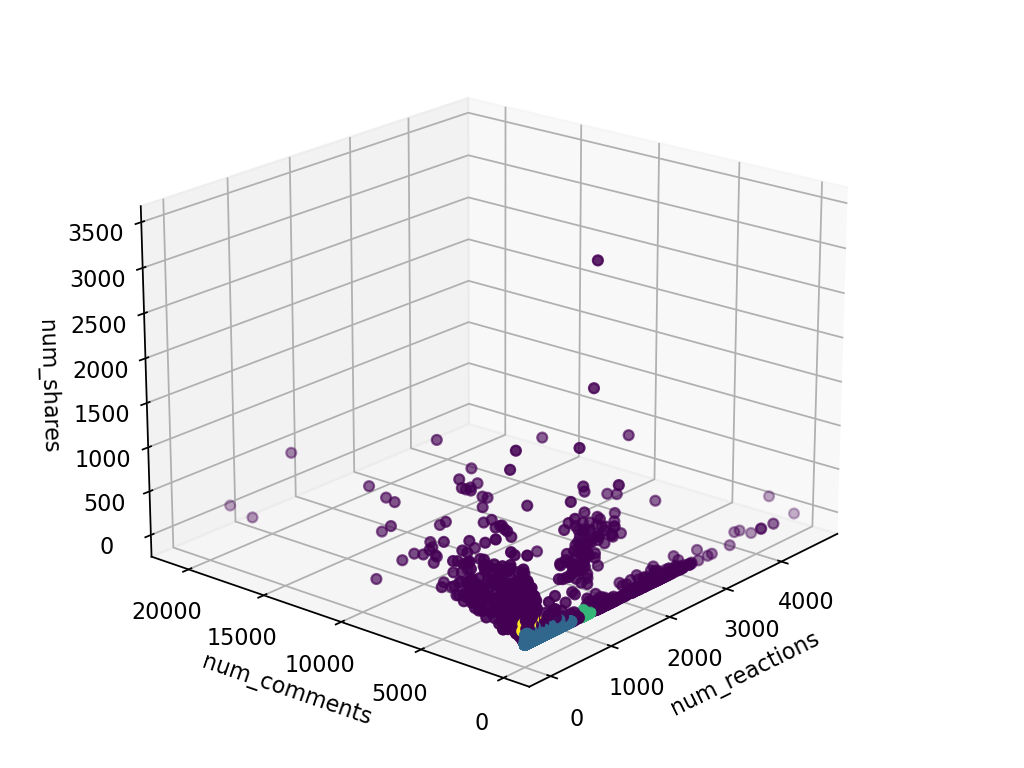

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_13460/725152138.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)


In [306]:
# Attempt to Improve Clusters

dbscan4 = DBSCAN(eps=75, min_samples=50)
labels4 = dbscan5.fit_predict(facebook[["num_reactions", "num_comments", "num_shares"]])


fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=-140)

plt.cla()

ax.set_xlabel("num_reactions")
ax.set_ylabel("num_comments")
ax.set_zlabel("num_shares")

ax.scatter(facebook["num_reactions"], facebook["num_comments"], facebook["num_shares"], c=pd.Series(labels4))

plt.show()

In [307]:
count4 = pd.value_counts(labels4)
reallabels = pd.value_counts(facebook['status_type'].tolist())

print("\n Attempt to Improve Clusters \n", count5, "\n \n Actual Dataset Lables\n", reallabels)


 Attempt to Improve Clusters 
  0    5537
-1    1255
 2     198
 1      60
dtype: int64 
 
 Actual Dataset Lables
 photo     4288
video     2334
status     365
link        63
dtype: int64
